# 使用前后psqi总分及各成分得分变化率热力图 

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import json

In [14]:
# 定义中文字体防止乱码
font_path = '../data/SimHei.ttf'
font_prop = fm.FontProperties(fname=font_path)

In [15]:
# 姓名、psqi总分及各成份数据
categories = ['陈东升', '从建明', '费艳冬', '甘颖婷', '刘汪昊', '藕有娣', '汤荀', '王瑜', '杨雅兰', '韩思洁','俞志江','郑慧', '徐悦', '沈发琴', '沈士国']

scores_right = {
    'A': np.array([2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2]),
    'B': np.array([2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1]),
    'C': np.array([1, 2, 2, 2, 2, 3, 2, 2, 0, 1, 3, 2, 0, 3, 0]),
    'D': np.array([1, 3, 1, 1, 3, 3, 1, 2, 2, 2, 3, 0, 0, 3, 0]),
    'E': np.array([2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0]),
    'F': np.array([0, 3, 1, 0, 2, 3, 3, 0, 3, 0, 0, 3, 3, 2, 3]),
    'G': np.array([2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 1]),
}

scores_left = {
    'A': np.array([1, 1, 2, 0, 2, 3, 2, 1, 1, 2, 1, 2, 2, 2, 3]),
    'B': np.array([0, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 3, 3, 3, 3]),
    'C': np.array([1, 0, 2, 2, 1, 3, 1, 0, 0, 1, 2, 2, 0, 3, 2]),
    'D': np.array([0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 3, 0]),
    'E': np.array([1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2]),
    'F': np.array([0, 3, 0, 0, 0, 3, 3, 0, 1, 0, 1, 3, 3, 3, 3]),
    'G': np.array([1, 3, 2, 3, 3, 3, 3, 1, 2, 2, 0, 3, 2, 3, 2]),
}

In [16]:
# # 遍历每个类别，并将使用前后的分数整理到字典中
data = {}
for i, category in enumerate(categories):
    data[f"{category}使用前"] = list(scores_right[letter][i] for letter in 'ABCDEFG')
    data[f"{category}使用后"] = list(scores_left[letter][i] for letter in 'ABCDEFG')

# 将字典转换为DataFrame
df = pd.DataFrame(data)

# 调整JSON格式以匹配示例
df_json = df.to_json(orient='columns', force_ascii=False, indent=4)
# 将JSON字符串转换为字典
df_json = json.loads(df_json)  # Convert to dict
# 格式化为所需的形式
formatted_json = {k: v for k, v in df_json.items()}  # Format as desired

data = {}
# 遍历格式化后的JSON数据，整理为新的字典结构
for key, value in formatted_json.items():
    data[key] = list(value.values())

# 将数据反转，使其顺序与原始顺序相反
reversed_data = {k: data[k] for k in reversed(data)}

data = reversed_data

result = {}
# 计算每个类别的总分，并将总分和各项分数整理到结果字典中
for key, values in data.items():
    total_score = sum(values)
    # 将总分和分数放入结果中
    result[key] = [total_score] + values

# 转换成DataFrame
df = pd.DataFrame(result)

In [17]:
# 计算相对变化率
relative_change = (df.filter(like='使用后').values - df.filter(like='使用前').values)/df.filter(like='使用前').values

# 用新的计算值更新 DataFrame
relative_change_df = pd.DataFrame(
    relative_change,
    index=df.index,
    columns=[col.replace('使用前', '') for col in df.columns if '使用前' in col]
)

# 定义索引的标签
labels = ['总分', '成分A', '成分B', '成分C', '成分D', '成分E', '成分F', '成分G']
relative_change_df.index = labels  # 将标签赋值给索引

/tmp/ipykernel_12296/1704352306.py:2: RuntimeWarning: divide by zero encountered in divide
  relative_change = (df.filter(like='使用后').values - df.filter(like='使用前').values)/df.filter(like='使用前').values
/tmp/ipykernel_12296/1704352306.py:2: RuntimeWarning: invalid value encountered in divide
  relative_change = (df.filter(like='使用后').values - df.filter(like='使用前').values)/df.filter(like='使用前').values


/home/lwd/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from current font.
  fig.canvas.draw()
/home/lwd/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.draw()
/home/lwd/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.draw()
/home/lwd/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 27784 (\N{CJK UNIFIED IDEOGRAPH-6C88}) missing from current font.
  fig.canvas.draw()
/home/lwd/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from current font.
  fig.canvas.draw()
/home/lwd/anaconda3/envs/pytorch/lib/python3.9/site-packages/seab

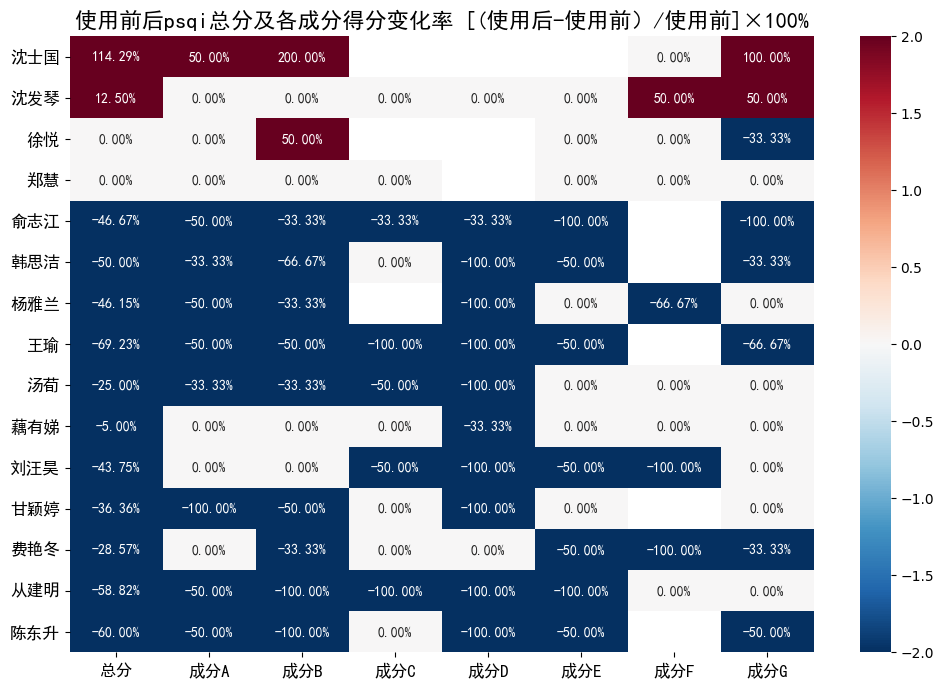

In [18]:
# 设置图形大小
plt.figure(figsize=(12, 8))  

 # 格式化百分比
def percent_formatter(x, pos):
    return f'{x:.0f}%' 

# 设置热图的值范围
heatmap = sns.heatmap(relative_change_df.T * 100, cmap='RdBu_r', annot=True, fmt='.2f',
                      annot_kws={'size': 10, 'fontproperties': font_prop},  # 注释的字体属性
                      vmin=-2, vmax=2)  

 # 添加百分号
for text in heatmap.texts:
    text.set_text(f"{text.get_text()}%") 

# 设置标题和标签，使用字体属性
plt.title('使用前后psqi总分及各成分得分变化率 [(使用后-使用前）/使用前]×100%', fontproperties=font_prop, fontsize=16)
plt.xlabel('', fontproperties=font_prop, fontsize=14)  
plt.ylabel('')  # 移除Y轴标签

# 设置刻度标签的字体属性并旋转Y轴标签
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontproperties=font_prop, fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontproperties=font_prop, fontsize=12, rotation=0)  # 不旋转标签

plt.savefig("../result/使用前后psqi总分及各成分得分变化率热力图.png")  
plt.show()  